# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [117]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
df = pd.read_csv(data_url)

In [119]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [120]:
#Importing Machine Learning libraries
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### Exploratory Data Analysis

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
Age                         1028 non-null int64
Attrition                   1028 non-null int64
BusinessTravel              1028 non-null object
DailyRate                   1028 non-null int64
Department                  1028 non-null object
DistanceFromHome            1028 non-null int64
Education                   1028 non-null int64
EducationField              1028 non-null object
EmployeeCount               1028 non-null int64
EmployeeNumber              1028 non-null int64
EnvironmentSatisfaction     1028 non-null int64
Gender                      1028 non-null object
HourlyRate                  1028 non-null int64
JobInvolvement              1028 non-null int64
JobLevel                    1028 non-null int64
JobRole                     1028 non-null object
JobSatisfaction             1028 non-null int64
MaritalStatus               1028 non-null object
MonthlyIncome          

In [122]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

In [123]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ID'],
      dtype='object')

In [124]:
df['Attrition'].value_counts()

0    856
1    172
Name: Attrition, dtype: int64

In [125]:
print(df.select_dtypes(np.number))
print(df.select_dtypes(object))

      Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1023   56          0       1255                 1          2              1   
1024   47          0        359                 2          4              1   
1025   24          0       1476                 4          1              1   
1026   32          0        601                 7          5              1   
1027   34          0        401                 1          3              1   

      EmployeeNumber  EnvironmentSatisfaction  Hour

##### Visualization

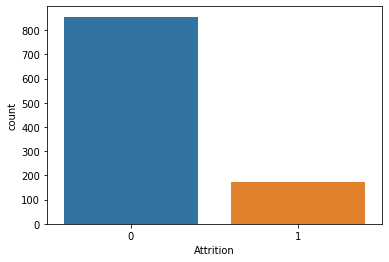

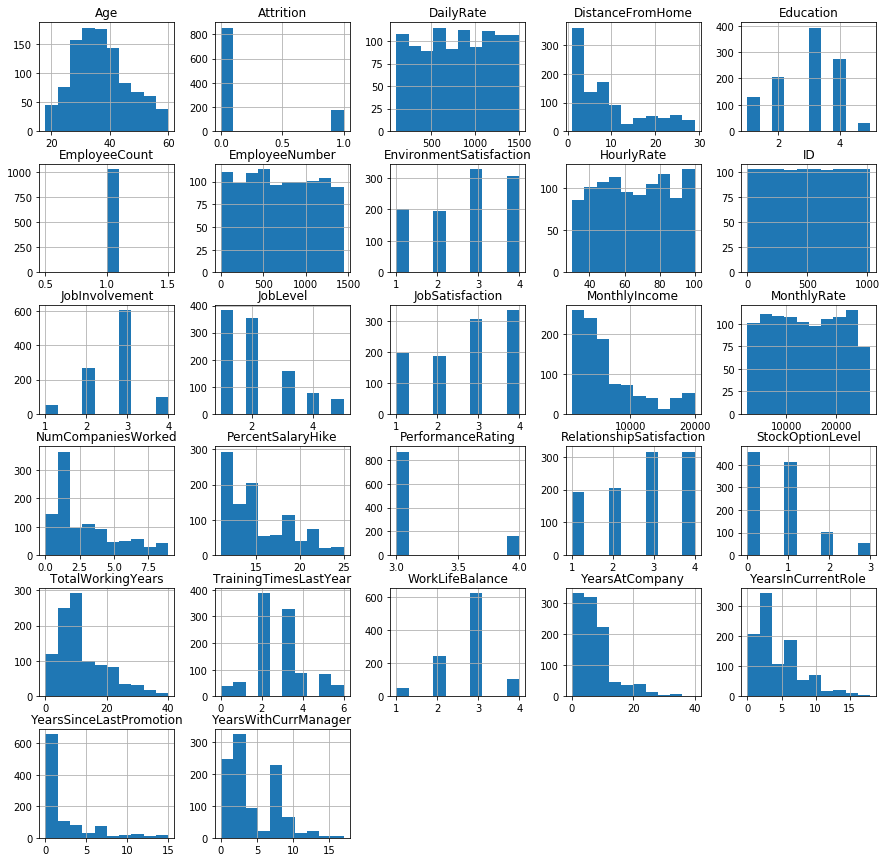

In [126]:
sns.countplot(df.Attrition)
plt.show()
df.hist(figsize=(15,15))
plt.show()

### RandomForestClassifier

In [127]:
#Features and Labels separation
num = df.select_dtypes(np.number)
x = num.drop(['Attrition'], axis=1)
y = df['Attrition']

In [128]:
#Training and testing set split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)

In [129]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
#Building the classifier
rfc = RandomForestClassifier(n_estimators=20, random_state=111)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)

In [131]:
#Prediction of test set
pred = rfc.predict(X_test)

In [165]:
#Accuracy results
predx = rfc.predict(X_train)
acc_x = accuracy_score(y_train, predx)
print("Accuracy on training data is ", (acc_x*100), "%")
predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on testing data is ", np.round(accuracy*100, 2), '%')

Accuracy on training data is  99.7566909975669 %
Accuracy on testing data is  84.95 %


In [133]:
#Building Confusion Matrix
conf_mat = confusion_matrix(y_test, pred)
print(conf_mat)
print(classification_report(y_test, pred))

[[170   2]
 [ 29   5]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       172
           1       0.71      0.15      0.24        34

    accuracy                           0.85       206
   macro avg       0.78      0.57      0.58       206
weighted avg       0.83      0.85      0.81       206



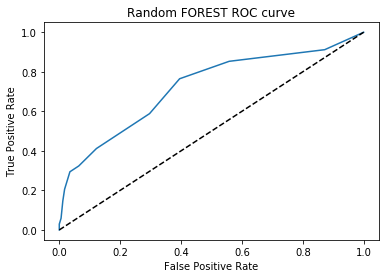

In [134]:
#ROC plot
prob = rfc.predict_proba(X_test)  
prob = prob[:, 1] 
fper, tper, thresholds = roc_curve(y_test, prob) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random FOREST ROC curve')
#show the plot
plt.show()

### XGB Classifier

In [167]:
#Features and Labels separation
x = num.drop(['Attrition'], axis=1)
y = df['Attrition']

In [168]:
#Train and test sets data split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)

In [169]:
#Building the classifier and fitting it to training set
xgbc = xgb.XGBClassifier(learning_rate=0.01)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
#Results and accuracy on the training set 
predx = xgbc.predict(X_train)
acc_x = accuracy_score(y_train, predx)
print("Accuracy on training data is ", np.round(acc_x*100), "%")
#Results and accuracy on the testing set 
predy = xgbc.predict(X_test)
acc_y = accuracy_score(y_test, predy)
print("Accuracy on testing data is ", np.round(acc_y*100), "%")

Accuracy on training data is  91.0 %
Accuracy on testing data is  82.0 %


In [140]:
#Building the confusion matrix
conf_mat = confusion_matrix(y_test, predy)
print(conf_mat)
print(classification_report(y_test, predy))

[[165   7]
 [ 30   4]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       172
           1       0.36      0.12      0.18        34

    accuracy                           0.82       206
   macro avg       0.60      0.54      0.54       206
weighted avg       0.77      0.82      0.78       206



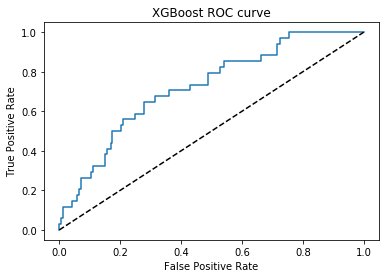

In [141]:
#ROC Curve
from sklearn.metrics import roc_curve  
prob = xgbc.predict_proba(X_test)  
prob = prob[:, 1] 
fper, tper, thresholds = roc_curve(y_test, prob) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

### Decision Tree 

In [142]:
#Features and Labels separation
x = num.drop(['Attrition'], axis=1)
y = df['Attrition']

In [143]:
#Train and test sets data split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)

In [144]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
#Building the classifier and fitting to the training set
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [146]:
#Predicting the test set results
predy = dtc.predict(X_test)

In [147]:
#Results and accuracy
predx = dtc.predict(X_train)
acc_x = accuracy_score(y_train, predx)
print("Accuracy on training data is ", (acc_x*100), "%")
predictions = dtc.predict(X_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on testing data is ", np.round(accuracy*100, 2), '%')

Accuracy on training data is  100.0 %
Accuracy on testing data is  76.7 %


In [148]:
#Building the Confusion Matrix
conf_mat = confusion_matrix(y_test, predy)
print(conf_mat)
print(classification_report(y_test, predy))

[[146  26]
 [ 22  12]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       172
           1       0.32      0.35      0.33        34

    accuracy                           0.77       206
   macro avg       0.59      0.60      0.60       206
weighted avg       0.78      0.77      0.77       206



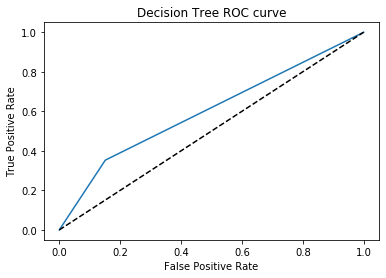

In [149]:
#ROC Curve
prob = dtc.predict_proba(X_test)  
prob = prob[:, 1] 
fper, tper, thresholds = roc_curve(y_test, prob) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

### K nearest neighbours

In [150]:
#Features and Labels separation
x = num.drop(['Attrition'], axis=1)
y = df['Attrition']

In [151]:
#Train and test sets data split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)

In [152]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [156]:
# Predicting the test set results
pred_y = knn.predict(X_test)

In [162]:
#Results and accuracy
predx = knn.predict(X_train)
acc_x = accuracy_score(y_train, predx)
print("Accuracy on training data is ", np.round(acc_x*100), "%")
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on testing data is ", np.round(accuracy*100, 2), '%')

Accuracy on training data is  88.0 %
Accuracy on testing data is  84.47 %


In [159]:
#Building the Confusion Matrix
conf_mat = confusion_matrix(y_test, pred_y)
print(conf_mat)
print(classification_report(y_test, pred_y))

[[170   2]
 [ 30   4]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       172
           1       0.67      0.12      0.20        34

    accuracy                           0.84       206
   macro avg       0.76      0.55      0.56       206
weighted avg       0.82      0.84      0.80       206



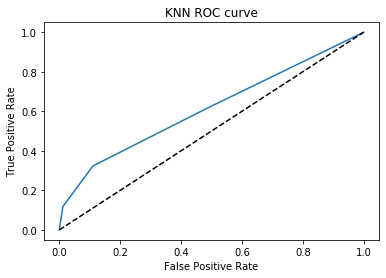

In [164]:
#ROC Curve
probs = knn.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
plt.show()

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  